### A mini-project that includes both data preprocessing to correct image rotation and data augmentation to include rotated versions of images in a training dataset. 

We'll use the popular CIFAR-10 dataset for this task due to its simplicity and also PyTorch and torchvision libraries.

1. Data Preprocessing to Correct Image Rotation
Here we simulate the preprocessing step to correct the rotation. For simplicity, we'll skip the detection part and assume we need to correct the images by a certain fixed angle. We can extend this later to include automatic angle detection by using techniques like edge detection or finding dominant lines in the image to estimate the angle.

2. Data Augmentation to Include Rotated Versions
Here we augment the dataset by including randomly rotated (within a range of -30 to 30 degrees) versions of the images for training. PyTorch's torchvision.transforms module provides a convenient way to apply transformations like rotation to our dataset

In [8]:
# Import Libraries

import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Transformation pipeline for preprocessing and augmentation
transform = transforms.Compose([
    # Preprocessing: Correct rotation (assuming a fixed angle for demonstration)
    transforms.RandomRotation(degrees=(90)),  # Replace 90 with the angle needed for correction
    # Augmentation: Include rotated versions in the training data
    transforms.RandomRotation(degrees=(-30, 30)),  # Random rotation between -30 and 30 degrees
    transforms.ToTensor(),
])

In [3]:
# Load CIFAR-10 dataset and apply the transformations.
# Note that we're applying the transformations on-the-fly — to each image in the CIFAR-10 dataset as it's loaded — 
# by specifying the transform argument in the datasets.CIFAR10 call in PyTorch
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Prepare a DataLoader for batching the images
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data


In [5]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize pixel values from [-1, 1] back to [0, 1]
    npimg = img.numpy() # converts the PyTorch tensor img into a NumPy array npimg
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # expects a NumPy array or a similar array-like structure
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

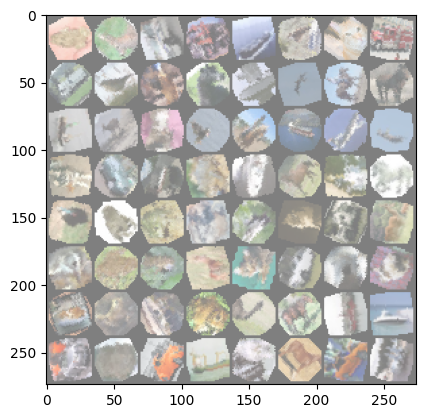

In [9]:
# Show images
# Since img contains a batch of images, torchvision.utils.make_grid is used 
# to arrange the batch in a grid format, making it easier to visualize multiple images at once.
imshow(torchvision.utils.make_grid(images))